# 🎥 Usando um GAN Pré-Treinado

Neste notebook, vamos explorar o uso de um **GAN pré-treinado** disponível no [TensorFlow Hub](https://tfhub.dev/).

- O modelo escolhido é o **Progressive GAN (ProGAN)**, treinado em rostos humanos (dataset CelebA-HQ).
- Assim, em vez de treinar do zero (que é computacionalmente caro), vamos apenas **gerar imagens sintéticas** de rostos.
- Esse é um ótimo exemplo de como GANs podem **criar dados realistas**.

## 1. Importando bibliotecas

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.19.0


## 2. Carregando o GAN pré-treinado (ProGAN)

Esse modelo foi treinado para gerar **rostos humanos sintéticos** a partir de vetores de ruído (latent vectors).

In [2]:
# Carrega o ProGAN pré-treinado do TensorFlow Hub
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']
print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


## 3. Gerando imagens sintéticas

- A entrada do modelo é um vetor de ruído (latent vector).
- O modelo aprende a transformar esse ruído em rostos realistas.
- Cada vetor gera uma face **única e sintética**.

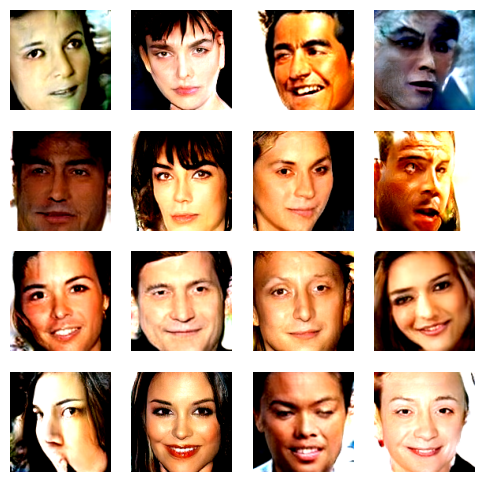

In [3]:
# Dimensão do espaço latente (definida pelo modelo)
latent_dim = 512

def generate_faces(n=16):
    noise = tf.random.normal([n, latent_dim])
    images = progan(noise)['default']
    images = tf.clip_by_value(images, 0.0, 1.0)
    return images

# Gerar 16 rostos falsos
images = generate_faces()
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()

## 4. Observações importantes

- Esses rostos **não são de pessoas reais**.
- São imagens sintéticas geradas pelo modelo.
- GANs são poderosos, mas também trazem riscos (ex: *deepfakes*).
- Ética e uso responsável são fundamentais!